In [1]:
import time
import tweepy
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [2]:
%run ./keys.ipynb

In [3]:
callback_uri = 'oob'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token,access_token_secret)

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
api = tweepy.API(auth)

In [7]:
tweets = []
likes = []

for tweet in tweepy.Cursor(api.search, q='#woolworths', rpp=100).items(50):
    tweets.append(tweet.text)
    likes.append(tweet.favorite_count)

In [8]:
df = pd.DataFrame({'Tweet':tweets,'Likes':likes})

In [9]:
df.head()

,Tweet,Likes
0,Alessio De Rossi likes BATA #Woolworths #MrPri...,0
1,RT @ZoomStocks: #Australia: Stocks on the move...,0
2,#Australia: Stocks on the move\n\n🔻 FinTech #A...,0
3,6. Forgot the hashtags 🧐 #sydneylockdown #Aldi...,0
4,RT @joy_zelda: RETWEET Pls For Awareness This ...,0


In [10]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT: ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [11]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [12]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [13]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [14]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [15]:
df.head(50)

,Tweet,Likes,Subjectivity,Polarity
0,Alessio De Rossi likes BATA Woolworths MrPrice...,0,0.000000,0.000000
1,RT : Australia: Stocks on the move\n\n🔻 FinTec...,0,0.000000,0.000000
2,Australia: Stocks on the move\n\n🔻 FinTech Aft...,0,0.000000,0.000000
3,6. Forgot the hashtags 🧐 sydneylockdown Aldi W...,0,0.000000,0.000000
4,RT _zelda: RETWEET Pls For Awareness This is 1...,0,0.125000,-0.050000
5,"bondi lockdown Day 3: early walk pre-dawn, the...",13,0.150000,0.050000
6,Nothing says woolworths like prawn chips…,2,0.000000,0.000000
7,RT _L: We are not ready to have an honest talk...,0,0.700000,0.250000
8,We are not ready to have an honest talk about ...,1,0.700000,0.250000
9,This potato and cream gratin is so yummy _SA y...,2,0.000000,0.000000


In [16]:
df = df.drop(df[df['Tweet']==''].index)

In [17]:
df.head(50)

,Tweet,Likes,Subjectivity,Polarity
0,Alessio De Rossi likes BATA Woolworths MrPrice...,0,0.000000,0.000000
1,RT : Australia: Stocks on the move\n\n🔻 FinTec...,0,0.000000,0.000000
2,Australia: Stocks on the move\n\n🔻 FinTech Aft...,0,0.000000,0.000000
3,6. Forgot the hashtags 🧐 sydneylockdown Aldi W...,0,0.000000,0.000000
4,RT _zelda: RETWEET Pls For Awareness This is 1...,0,0.125000,-0.050000
5,"bondi lockdown Day 3: early walk pre-dawn, the...",13,0.150000,0.050000
6,Nothing says woolworths like prawn chips…,2,0.000000,0.000000
7,RT _L: We are not ready to have an honest talk...,0,0.700000,0.250000
8,We are not ready to have an honest talk about ...,1,0.700000,0.250000
9,This potato and cream gratin is so yummy _SA y...,2,0.000000,0.000000


In [18]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    elif a>0:
        return "Positive"

In [19]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)

In [20]:
positive=df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/df.shape[0]*100

16.0% of positive tweets


In [21]:
negative=df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/df.shape[0]*100

26.0% of negative tweets


In [22]:
neutral=df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
neutral1=neutral.shape[0]/df.shape[0]*100

57.99999999999999% of neutral tweets


In [23]:
explode=[0,0.1,0]
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutral1]
colors=['yellowgreen','lightcoral','gold']

(-1.1806574046144094,
 1.1154120718252942,
 -1.1766410987742408,
 1.1120896069352575)

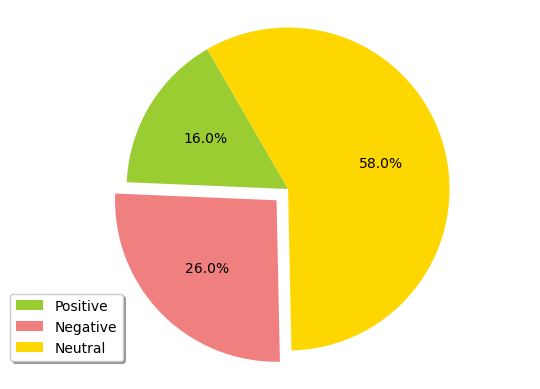

In [24]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')

<BarContainer object of 3 artists>

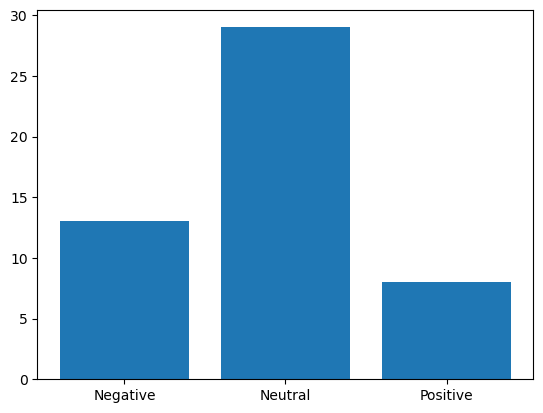

In [25]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
plt.bar(labels,values)

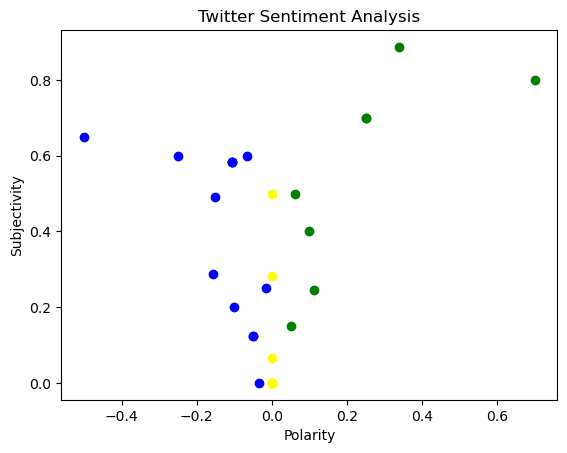

In [26]:
for index, row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='yellow')
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [27]:
mostlike = df.loc[df.Likes.nlargest(10).index]

In [28]:
mostlike

,Tweet,Likes,Subjectivity,Polarity,Score
5,"bondi lockdown Day 3: early walk pre-dawn, the...",13,0.150000,0.050000,Positive
34,First day of lockdown and already the shelves ...,8,0.583333,-0.105208,Negative
40,Aisle 11 requires restocking. Woolworths,8,0.000000,0.000000,Neutral
6,Nothing says woolworths like prawn chips…,2,0.000000,0.000000,Neutral
9,This potato and cream gratin is so yummy _SA y...,2,0.000000,0.000000,Neutral
12,"Wie respektlos kann es sein, dass Woolworth am...",2,0.000000,0.000000,Neutral
19,2 week lockdown do people not understand that ...,2,0.650000,-0.500000,Negative
20,Woolworths smeg,2,0.000000,0.000000,Neutral
23,regulators must enforce Code of Ethics (Feb 2...,2,0.000000,0.000000,Neutral
26,Please accept my pictorial contribution to the...,2,0.000000,0.000000,Neutral


In [30]:
import seaborn as sns
import spacy

In [44]:
nlp = spacy.load('en_core_web_1g')

OSError: [E050] Can't find model 'en_core_web_1g'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [31]:
list_of_sentences = [sentence for sentence in df.Tweet]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [32]:
lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [33]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [39]:
df2 = pd.DataFrame(stem)
df2 = df2[0].value_counts()

/Users/Vivian/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Vivian/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Vivian/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Vivian/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Vivian/opt/anaconda3/envs/my-env/lib/py

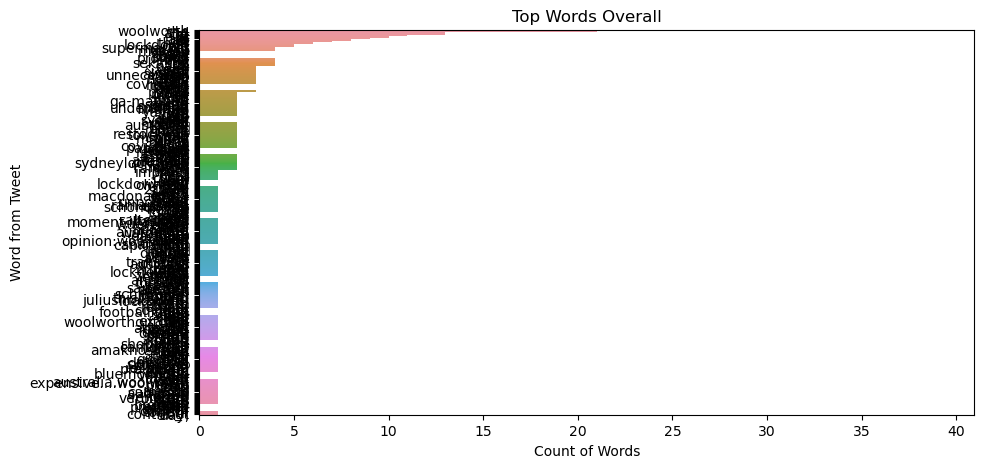

In [43]:
df = df2[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()